# Session 21 Multi-Index Series and DataFrames

In [1]:
import pandas as pd

# 📊 MultiIndex in Pandas (Series & DataFrames)

## 🔹 What is a MultiIndex?

A **MultiIndex** (also called **hierarchical indexing**) allows pandas objects (Series or DataFrames) to have **multiple index levels** instead of a single flat index.

This is useful when:

* Data is naturally grouped (e.g., *branch → year*)
* You want to **access or slice data using one level of the index**
* You want cleaner representation of high-dimensional data

---

## ❌ Tuple Index ≠ MultiIndex

Let’s start with a common mistake.

```python
index_val = [
    ('cse', 2019), ('cse', 2020), ('cse', 2021), ('cse', 2022),
    ('ece', 2019), ('ece', 2020), ('ece', 2021), ('ece', 2022)
]

a = pd.Series([1, 2, 3, 4, 5, 6, 7, 8], index=index_val)
a
```

### ❗ Why this is NOT a MultiIndex

* The index here is **just a list of tuples**
* Pandas treats each tuple as **one single index value**
* You **cannot access data by only `branch` or only `year`**

Example problem:

```python
a['cse']   # ❌ will raise KeyError
```

So even though it *looks* hierarchical, **it isn’t**.

---

## ✅ True MultiIndex (Hierarchical Index)

To create a real MultiIndex, we must **decouple** the index levels.

### ✔️ Ways to create a MultiIndex

1. `pd.MultiIndex.from_tuples()`
2. `pd.MultiIndex.from_product()`

---

## 🔹 Method 1: `from_tuples()`

### Step 1: Create a MultiIndex object

```python
index_val = [
    ('cse', 2019), ('cse', 2020), ('cse', 2021), ('cse', 2022),
    ('ece', 2019), ('ece', 2020), ('ece', 2021), ('ece', 2022)
]

multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex
```

### Step 2: Create a MultiIndex Series

```python
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8], index=multiindex)
s
```

Now this **is a real MultiIndex Series**.

---

## 🔍 How to verify it’s a real MultiIndex

```python
multiindex.levels
```

### Output explanation:

* `levels[0]` → Branch (`cse`, `ece`)
* `levels[1]` → Year (`2019`, `2020`, `2021`, `2022`)

This confirms that pandas has **separate index levels**, not tuples.

---

## 🔹 Method 2: `from_product()` (Cartesian Product)

This method is useful when index values follow a **systematic pattern**.

```python
multiindex = pd.MultiIndex.from_product(
    [['cse', 'ece'], [2019, 2020, 2021, 2022]]
)
multiindex
```

### Creating a Series using this MultiIndex

```python
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8], index=multiindex)
s
```

---

## 🧠 Why MultiIndex is Powerful

With a true MultiIndex, you can:

* Select by **one level**
* Perform **grouped operations**
* Represent **multi-dimensional data** cleanly

Example:

```python
s['cse']        # all years for CSE
s.loc[:, 2021]  # all branches for 2021 (if DataFrame)
```

In [2]:
index_val = [
    ("cse", 2019),
    ("cse", 2020),
    ("cse", 2021),
    ("cse", 2022),
    ("ece", 2019),
    ("ece", 2020),
    ("ece", 2021),
    ("ece", 2022),
]
a = pd.Series([1, 2, 3, 4, 5, 6, 7, 8], index=index_val)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [3]:
# creating a multi-index object
index_val = [
    ("cse", 2019),
    ("cse", 2020),
    ("cse", 2021),
    ("cse", 2022),
    ("ece", 2019),
    ("ece", 2020),
    ("ece", 2021),
    ("ece", 2022),
]
multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

Even though the above output looks much similar to the primitive multi-index object that we tried creating earlier, but the difference can be figured out from the following code:

In [4]:
multiindex.levels

FrozenList([['cse', 'ece'], [2019, 2020, 2021, 2022]])

In [5]:
# another way of creating a multi-index object
multiindex = pd.MultiIndex.from_product([["cse", "ece"], [2019, 2020, 2021, 2022]])
multiindex

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

Now finally in the below code we are creating a **Multi-Index Series**.

In [6]:
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8], index=multiindex)
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

## 📌 Fetching Items from a **MultiIndex Series**

A **MultiIndex Series** allows data to be accessed using:

* Only the **outer (super) index**
* Or a **combination of outer + inner (sub) index**

Let’s use the previously created MultiIndex Series `s`.

---

### 🔹 Fetching using the **super index** (outer level)

```python
s['cse']
```

✅ Output:

* Returns **all values for the branch `cse`**
* The remaining index level (`year`) is preserved

---

### 🔹 Fetching using **super + sub index**

```python
s['cse', 2020]
```

✅ Output:

* Returns the **single value** corresponding to:

  * Branch → `cse`
  * Year → `2020`

---

## 🧠 Dimensionality of a MultiIndex Series

A **MultiIndex Series is multi-dimensional**.

In this example:

* **Dimension 1** → Branch (`cse`, `ece`)
* **Dimension 2** → Year (`2019–2022`)

To extract **one specific data point**, we must provide **two parameters**:

```python
(branch, year)
```

Hence, this is a **2-Dimensional Series**.

> ⚠️ A normal Series is 1-D
> ⚠️ A MultiIndex Series can be **2-D, 3-D, or even higher**

---

## 🔁 Converting MultiIndex Series to DataFrame (`unstack`)

Instead of storing such data in a MultiIndex Series, we can also represent it using a **DataFrame**, where:

* One index level becomes **rows**
* The other becomes **columns**

### 🔹 Using `unstack()`

```python
temp = s.unstack()
temp
```

### What `unstack()` does:

* Converts the **inner index level** (`year`) into **columns**
* Converts the MultiIndex Series into a **DataFrame**

Now:

* Rows → `branch`
* Columns → `year`
* Values → data

---

## 🔄 Converting DataFrame back to MultiIndex Series (`stack`)

If required, the DataFrame can be converted **back** into a MultiIndex Series.

```python
temp.stack()
```

### What `stack()` does:

* Moves columns back into the index
* Recreates the **hierarchical (MultiIndex) structure**

So:

* `unstack()` → Series → DataFrame
* `stack()` → DataFrame → Series

---

## ❓ Why Use a MultiIndex Series Instead of a DataFrame?

This is **very important conceptually** 👇

### 🔹 Key Reason: **Higher Dimensional Data**

* A **DataFrame** can handle **only 2 dimensions**

  * Rows × Columns
* A **MultiIndex Series** can handle **N dimensions**

Example:

```text
(branch, year, semester, subject) → value
```

This is **not possible** with a normal DataFrame without complex reshaping.

---

### 🔹 Advantages of MultiIndex

✅ Can represent **high-dimensional data**
✅ Cleaner logical grouping
✅ Flexible slicing using index levels
✅ Avoids unnecessary DataFrame explosion
✅ Natural fit for hierarchical datasets

In [7]:
# fetching using the branch name
s["cse"]

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [8]:
# fetching using the year
s["cse", 2020]

np.int64(2)

In [9]:
# unstack
temp = s.unstack()
temp

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


In [10]:
# stack
temp.stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

# 📊 MultiIndex DataFrame

A **MultiIndex DataFrame** extends the idea of hierarchical indexing to **tabular (2D) data**, allowing:

* Multiple levels in **rows (index)**
* Multiple levels in **columns**

---

## 🔹 MultiIndex on Rows (Index)

```python
branch_df1 = pd.DataFrame(
  [
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 10],
    [11, 12],
    [13, 14],
    [15, 16]
  ],
  index = multiindex,
  columns = ['avg_package', 'students']
)

branch_df1
```

Here:

* **Row index** → MultiIndex (`branch`, `year`)
* **Columns** → Single level

---

### 🔹 Row-based extraction

```python
branch_df1.loc['cse']
```

✅ Returns all rows where:

* `branch = cse`
* Index now contains only `year`

```python
branch_df1.loc['ece']
```

---

### 🔹 Column-based extraction

```python
branch_df1['avg_package']
```

```python
branch_df1['students']
```

Columns behave just like a **Series selector** here.

---

## 🔹 MultiIndex on Columns

Since pandas allows **multiple levels of index**, it also allows **multiple levels of columns**.

```python
branch_df2 = pd.DataFrame(
  [
    [1, 2, 0, 0],
    [3, 4, 0, 0],
    [5, 6, 0, 0],
    [7, 8, 0, 0],
  ],
  index = [2019, 2020, 2021, 2022],
  columns = pd.MultiIndex.from_product(
      [['delhi', 'mumbai'], ['avg_package', 'students']]
  )
)

branch_df2
```

### Structure:

* **Index** → Year
* **Column Level 1** → City (`delhi`, `mumbai`)
* **Column Level 2** → Metric (`avg_package`, `students`)

---

## ❓ Are Columns Really Different from Index?

**Conceptually → No.**
**Practically → Yes.**

### How pandas interprets them:

* Both **index and columns are Index objects**
* Both can be:

  * Single-level
  * Multi-level (MultiIndex)

### Key difference:

| Aspect      | Index (Rows)     | Columns            |
| ----------- | ---------------- | ------------------ |
| Access      | `.loc[]`         | `[]`               |
| Orientation | Vertical         | Horizontal         |
| Purpose     | Identify records | Identify variables |

➡️ Pandas treats **columns as a special type of index aligned horizontally**.

That’s why:

* MultiIndex works for both rows **and** columns
* `stack()` and `unstack()` can move data between them

---

## 🔍 Extracting Data from MultiIndex Columns

### 🔹 City-wise extraction

```python
branch_df2['delhi']
```

Returns all metrics for **Delhi**.

---

### 🔹 Specific metric from a city

```python
branch_df2['mumbai']['avg_package']
```

Equivalent to:

```python
branch_df2.loc[:, ('mumbai', 'avg_package')]
```

---

### 🔹 Year-based extraction

```python
branch_df2.loc[2019]
```

Returns:

* All cities
* All metrics
* For the year 2019

---

## 🔹 Representing Higher-Dimensional Data (4D Example)

Now let’s create **branch_df3**, adding another index level (`branch`) on top of `year`.

```python
branch_df3 = pd.DataFrame(
  [
    [1, 2, 0, 0],
    [3, 4, 0, 0],
    [5, 6, 0, 0],
    [7, 8, 0, 0],
    [9, 10, 0, 0],
    [11, 12, 0, 0],
    [13, 14, 0, 0],
    [15, 16, 0, 0],
  ],
  index = pd.MultiIndex.from_product(
      [['cse', 'ece'], [2019, 2020, 2021, 2022]]
  ),
  columns = pd.MultiIndex.from_product(
      [['delhi', 'mumbai'], ['avg_package', 'students']]
  )
)

branch_df3
```

---

## 🧠 Understanding the Dimensionality (VERY IMPORTANT)

This DataFrame represents **4D data**:

1. **Branch** → `cse`, `ece`
2. **Year** → `2019–2022`
3. **City** → `delhi`, `mumbai`
4. **Metric** → `avg_package`, `students`

Yet, pandas stores it in a **2D DataFrame** using:

* MultiIndex rows
* MultiIndex columns

➡️ This is the **core power of MultiIndex**.

In [11]:
# multi-index DataFrame
branch_df1 = pd.DataFrame(
    [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14], [15, 16]],
    index=multiindex,
    columns=["avg_package", "students"],
)

branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [12]:
branch_df1.loc["cse"]

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [13]:
branch_df1.loc["ece"]

,avg_package,students
2019,9,10
2020,11,12
2021,13,14
2022,15,16


In [14]:
branch_df1["avg_package"]

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
     2022    15
Name: avg_package, dtype: int64

In [15]:
branch_df1["students"]

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [16]:
branch_df2 = pd.DataFrame(
    [
        [1, 2, 0, 0],
        [3, 4, 0, 0],
        [5, 6, 0, 0],
        [7, 8, 0, 0],
    ],
    index=[2019, 2020, 2021, 2022],
    columns=pd.MultiIndex.from_product(
        [["delhi", "mumbai"], ["avg_package", "students"]]
    ),
)

branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [17]:
branch_df2["delhi"]

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [18]:
branch_df2["mumbai"]["avg_package"]

2019    0
2020    0
2021    0
2022    0
Name: avg_package, dtype: int64

In [19]:
branch_df2.loc[2019]

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: 2019, dtype: int64

In [20]:
branch_df3 = pd.DataFrame(
    [
        [1, 2, 0, 0],
        [3, 4, 0, 0],
        [5, 6, 0, 0],
        [7, 8, 0, 0],
        [9, 10, 0, 0],
        [11, 12, 0, 0],
        [13, 14, 0, 0],
        [15, 16, 0, 0],
    ],
    index=pd.MultiIndex.from_product([["cse", "ece"], [2019, 2020, 2021, 2022]]),
    columns=pd.MultiIndex.from_product(
        [["delhi", "mumbai"], ["avg_package", "students"]]
    ),
)

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

## 🔄 Stacking and Unstacking in Pandas

`stack()` and `unstack()` are used to **move data between index levels and columns**, allowing us to reshape data **without losing information**.

---

## 🔹 Unstacking a MultiIndex DataFrame

```python
branch_df1.unstack()
```

### What happens here?

* `branch_df1` has a **MultiIndex on rows**:

  * Level 0 → `branch`
  * Level 1 → `year`
* `unstack()`:

  * **Removes the lowest level of the index** (`year`)
  * Converts it into a **sub-level of columns**

### Result:

* Index → `branch`
* Columns → `(avg_package, year)` and `(students, year)`

So, the **row dimension is reduced**, and the **column dimension becomes hierarchical**.

---

## 🔁 Running `unstack()` again

```python
branch_df1.unstack().unstack()
```

### What happens now?

* The remaining index level (`branch`) is unstacked
* This index level is converted into a **column-level attribute**
* Since **all index levels are exhausted**, pandas has **only one row left**

### Final result:

* Object automatically converts into a **Series**
* Reason: pandas converts to the **lowest possible dimensional object**

📌 Rule:

> When a DataFrame collapses to a single row with no meaningful index, pandas returns a **Series**

---

## 🔹 Stacking a DataFrame

```python
branch_df1.stack()
```

### What happens here?

* `stack()` moves the **column level into the index**
* Since `branch_df1` has:

  * MultiIndex rows
  * Single-level columns
* After stacking:

  * Columns are removed
  * Data becomes **fully index-based**

### Result:

* Output is a **MultiIndex Series**
* Index levels become:

  * `branch`
  * `year`
  * `column_name` (`avg_package`, `students`)

📌 Since there are **no columns left**, pandas returns a **Series**

---

## 🧠 Key Intuition (Very Important)

| Operation        | Effect                       |
| ---------------- | ---------------------------- |
| `unstack()`      | Index → Columns              |
| `stack()`        | Columns → Index              |
| Repeated unstack | Reduces index dimensionality |
| No columns left  | Output becomes Series        |
| No index left    | Output becomes Series        |

In [21]:
branch_df1.unstack()

avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
cse           1    3    5    7        2    4    6    8
ece           9   11   13   15       10   12   14   16

In [22]:
branch_df1.unstack().unstack()

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

In [23]:
branch_df1.stack()

cse  2019  avg_package     1
           students        2
     2020  avg_package     3
           students        4
     2021  avg_package     5
           students        6
     2022  avg_package     7
           students        8
ece  2019  avg_package     9
           students       10
     2020  avg_package    11
           students       12
     2021  avg_package    13
           students       14
     2022  avg_package    15
           students       16
dtype: int64

## 📌 Common DataFrame Operations on a MultiIndex DataFrame

A **MultiIndex DataFrame is still a DataFrame**.
The presence of multiple index levels **does not restrict** the usage of standard DataFrame methods.

---

## 🔹 Viewing Data (`head` & `tail`)

```python
branch_df3.head()
```

* Displays the **first 5 rows**
* Includes all index levels and column levels

---

## 🔹 Shape of the DataFrame

```python
branch_df3.shape
```

### Output:

```
(8, 4)
```

Meaning:

* **8 rows**
* **4 columns**

📌 Important:

* `shape` counts **actual rows and columns**
* It **does not care** how many index or column levels exist

---

## 🔹 Information Summary

```python
branch_df3.info()
```

Provides:

* Total number of rows
* Column count
* Data types
* Memory usage

📌 Even with MultiIndex:

* Pandas treats this as a **regular DataFrame**
* Index levels are metadata, not columns

---

## 🔹 Using Standard DataFrame Functions

All regular DataFrame functions work normally on a MultiIndex DataFrame.

### Example: Finding Duplicate Rows

```python
branch_df3.duplicated()
```

* Checks for **duplicate rows**
* Returns a **Boolean Series**
* Comparison is done **row-wise**, considering **all columns**

📌 Index values (including MultiIndex levels) are **not considered** unless explicitly reset.

---

## 🧠 Key Takeaway

> **MultiIndex affects how data is labeled and accessed, not how DataFrame methods work.**

So:

* Filtering
* Aggregation
* Sorting
* Duplicates
* Missing values
  all work **exactly the same** as with a normal DataFrame.

In [24]:
# head and tail
branch_df3.head()

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0

In [25]:
# shape
branch_df3.shape

# output: 8 rows and 4 cols

(8, 4)

In [26]:
branch_df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', np.int64(2019)) to ('ece', np.int64(2022))
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 632.0+ bytes


In [27]:
branch_df3.duplicated()

cse  2019    False
     2020    False
     2021    False
     2022    False
ece  2019    False
     2020    False
     2021    False
     2022    False
dtype: bool

## ⚙️ Performing Operations on MultiIndex DataFrames

A MultiIndex DataFrame supports **all standard DataFrame operations**, along with **hierarchical-aware slicing and sorting**.

---

## 🔹 Extracting Rows

### ✔️ Extracting a **single row** using `.loc`

```python
branch_df3.loc[('cse', 2022)]
```

* Selects the row where:

  * `branch = cse`
  * `year = 2022`
* Returns a **Series** containing all column values

---

### ✔️ Extracting **multiple rows** using `.loc` (label-based slicing)

```python
branch_df3.loc[('cse', 2019): ('ece', 2020): 2]
```

* Performs slicing on **MultiIndex labels**
* Works only when the index is **sorted**
* `:2` → selects **alternate rows**

📌 Label-based slicing respects **hierarchical order**, not physical row position.

---

### ✔️ Extracting rows using `.iloc` (position-based slicing)

```python
branch_df3.iloc[0:5:2]
```

* Uses **integer positions**
* Independent of index labels
* Useful when index is unsorted or unknown

---

## 🔹 Extracting Columns

### ✔️ Extracting a column group

```python
branch_df3['delhi']
```

* Selects all metrics under **Delhi**
* Returns a DataFrame

---

### ✔️ Extracting a specific metric from a column group

```python
branch_df3['delhi']['students']
```

* Returns a **Series**
* Equivalent to:

```python
branch_df3.loc[:, ('delhi', 'students')]
```

---

### ✔️ Extracting selected columns using `.iloc`

```python
branch_df3.iloc[:, 1:3]
```

* Selects columns by **position**
* Useful when working with wide MultiIndex columns

---

### ✔️ Extracting both rows and columns

```python
branch_df3.iloc[[0, 4], [1, 2]]
```

* Selects:

  * Rows at positions `0` and `4`
  * Columns at positions `1` and `2`
* Returns a DataFrame

---

## 🔹 Sorting a MultiIndex DataFrame

### ✔️ Sorting on **all index levels**

```python
branch_df3.sort_index(ascending=False)
```

* Sorts both index levels in **descending order**

---

### ✔️ Sorting multiple levels in different orders

```python
branch_df3.sort_index(ascending=[False, True])
```

* Level 0 (`branch`) → descending
* Level 1 (`year`) → ascending

---

### ✔️ Sorting based on a **specific index level**

```python
branch_df3.sort_index(level=1, ascending=[False])
```

* Sorts only by **year**
* Branch order remains unchanged

---

## 🔹 Transposing a MultiIndex DataFrame

```python
branch_df3.transpose()
```

* Swaps **rows and columns**
* Index becomes columns
* Columns become index
* Works for **both normal and MultiIndex DataFrames**

📌 Useful when analyzing data from a different perspective.

---

## 🔹 Swapping Index Levels

### ✔️ Swapping row index levels

```python
branch_df3.swaplevel()
```

* Swaps:

  * Level 0 ↔ Level 1 of the index
* Changes hierarchical order **without modifying data**

---

### ✔️ Swapping column index levels

```python
branch_df3.swaplevel(axis=1)
```

* Swaps levels in **MultiIndex columns**
* Useful for re-grouping metrics

---

## 🧠 Key Takeaways

* `.loc` → label-based, hierarchy-aware
* `.iloc` → position-based, hierarchy-agnostic
* Sorting can be done:

  * On all levels
  * On selected levels
  * In different orders
* `transpose()` flips rows and columns
* `swaplevel()` rearranges hierarchy without changing data

In [28]:
# Extracting rows single
branch_df3.loc[('cse', 2022)]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [29]:
# Extracting multiple rows using loc
# extracting alternative rows starting from cse 2019 to ece 2020
branch_df3.loc[('cse', 2019): ('ece', 2020): 2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [30]:
# Extracting multiple rows using iloc
# extracting alternative rows starting from cse 2019 to ece 2020
branch_df3.iloc[0:5:2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [31]:
# extracting single col
branch_df3['delhi']

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [32]:
# extracting single col
branch_df3['delhi']['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [33]:
# extracting 'students' of 'delhi' and 'avg_package' of 'mumbai'
branch_df3.iloc[:, 1:3]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [34]:
# extracting both
branch_df3.iloc[[0, 4], [1, 2]]

,,delhi,mumbai
,,students,avg_package
cse,2019,2,0
ece,2019,10,0


In [35]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [36]:
# sorting index
# both -> descending -> diff order
# based on both levels on index
branch_df3.sort_index(ascending=False)

delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0

In [37]:
# in case we have to sort multiple levels in different order
branch_df3.sort_index(ascending=[False, True])

delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [38]:
# in case we have to sort on only one level of index
branch_df3.sort_index(level=1, ascending=[False])

delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
ece 2022          15       16           0        0
cse 2021           5        6           0        0
ece 2021          13       14           0        0
cse 2020           3        4           0        0
ece 2020          11       12           0        0
cse 2019           1        2           0        0
ece 2019           9       10           0        0

In [39]:
# multiindex dataframe(col) -> transpose
# converts indices into cols and vice versa (also works on a normal df)
branch_df3.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [40]:
# swaplevel
# used for swapping the levels of indices
branch_df3.swaplevel()

delhi               mumbai         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0
2019 ece           9       10           0        0
2020 ece          11       12           0        0
2021 ece          13       14           0        0
2022 ece          15       16           0        0

In [41]:
# we can also swap the levels of cols
branch_df3.swaplevel(axis=1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

## 🔁 Melt, Pivot, and Pivot Table

To understand **`melt()`**, **`pivot()`**, and **`pivot_table()`**, we must first understand the difference between **Long (Tall)** and **Wide** data formats.

---

## 📊 Long vs Wide Data

### 🔹 Wide Data Format

* One row represents **one entity**
* Multiple columns represent **different attributes**
* Easier for **human readability**
* Common in **databases and reports**

Example (Wide):

```text
branch | 2020 | 2021 | 2022
cse    | 100  | 120  | 150
ece    | 150  | 130  | 140
```

---

### 🔹 Long (Tall) Data Format

* One row represents **one observation**
* Attributes are stored as **values in rows**
* Preferred for **analysis, visualization, ML**

Example (Long):

```text
branch | year | students
cse    | 2020 | 100
cse    | 2021 | 120
```

---

## ❓ Why Do Both Formats Exist?

If both formats contain the **same information**, why do we need two?

### ✅ Reason:

Different systems follow **different storage philosophies**:

* **Databases (OLTP systems)**
  → Data is often **Wide**
* **Data Warehouses / Data Marts / Data Lakes**
  → Data is often **Long**
* **APIs & CSV exports**
  → Often Wide for reporting
* **Analytics & ML workflows**
  → Prefer Long format

📌 A **Data Scientist must be comfortable with both formats** and know how to **convert between them**.

---

## 🔄 Melt vs Pivot (High-Level)

| Function        | Converts                       |
| --------------- | ------------------------------ |
| `melt()`        | Wide → Long                    |
| `pivot()`       | Long → Wide                    |
| `pivot_table()` | Long → Wide (with aggregation) |

---

## 🔥 `melt()` — Wide to Long

### 🔹 Simple Example

```python
pd.DataFrame({'cse': [120]})
```

Wide format with a single column.

```python
pd.DataFrame({'cse': [120]}).melt()
```

🔍 Output:

* Column name → `variable`
* Value → `value`

---

### 🔹 Multiple Columns Example

```python
pd.DataFrame({'cse': [120], 'ece': [100], 'mech': [50]})
```

```python
pd.DataFrame({'cse': [120], 'ece': [100], 'mech': [50]}).melt(
    var_name='branch',
    value_name='no. of students'
)
```

📌 Explanation:

* Column names become **categorical values**
* Each column is converted into a row

---

## 🔹 Structured Wide Data Example

```python
pd.DataFrame({
  'branch': ['cse', 'ece', 'mech'],
  2020: [100, 150, 60],
  2021: [120, 130, 140],
  2022: [150, 140, 70]
})
```

This is a **classic wide dataset**:

* Rows → branch
* Columns → years

---

### 🔹 Converting Wide → Long using `melt()`

```python
pd.DataFrame({
  'branch': ['cse', 'ece', 'mech'],
  2020: [100, 150, 60],
  2021: [120, 130, 140],
  2022: [150, 140, 70]
}).melt(
    id_vars=['branch'],
    var_name='year',
    value_name='students'
)
```

📌 Key Point:

* `id_vars` prevents `branch` from being melted
* Without it, the data would lose meaning

---

## 🌍 Real-World Example (COVID Time Series Data)

These datasets are **wide time-series data**, where each date is a column.

```python
deaths = pd.read_csv("datasets/time_series_covid19_deaths_global.csv")
deaths
```

```python
confirm = pd.read_csv("datasets/time_series_covid19_confirmed_global.csv")
confirm
```

---

### 🔹 Melting the Time-Series Data

```python
deaths = deaths.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="Date",
    value_name="Deaths"
)

confirm = confirm.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="Date",
    value_name="Confirmed Cases"
)
```

📌 Explanation:

* Dates become rows instead of columns
* Dataset becomes **time-series friendly**
* Ready for:

  * Visualization
  * GroupBy
  * ML models

---

### 🔹 Previewing the Results

```python
deaths.head()
```

```python
confirm.head()
```

---

## 🔗 Merging the Two Long Datasets

```python
merged_df = confirm.merge(
    deaths,
    on=["Province/State", "Country/Region", "Lat", "Long", "Date"]
)
```

Now both datasets:

* Share the same structure
* Can be analyzed together

```python
merged_df.head()
```

---

### 🔹 Selecting Relevant Columns

```python
merged_df[["Country/Region", "Date", "Confirmed Cases", "Deaths"]]
```

📌 This is now **clean, analysis-ready data**.


In [42]:
# melt -> simple example branch
# wide to long
pd.DataFrame({'cse': [120]})

,cse
0,120


In [43]:
pd.DataFrame({'cse': [120]}).melt()

,variable,value
0,cse,120


In [44]:
pd.DataFrame({'cse': [120], 'ece': [100], 'mech':[50]})

,cse,ece,mech
0,120,100,50


In [45]:
# an example of melt
pd.DataFrame({'cse': [120], 'ece': [100], 'mech':[50]}).melt(var_name='branch', value_name='no. of students')

,branch,no. of students
0,cse,120
1,ece,100
2,mech,50


In [46]:
# another example of a wide data format
pd.DataFrame({
  'branch': ['cse', 'ece', 'mech'],
  2020: [100, 150, 60],
  2021: [120, 130, 140],
  2022: [150, 140, 70]
})

,branch,2020,2021,2022
0,cse,100,120,150
1,ece,150,130,140
2,mech,60,140,70


In [47]:
# converting the above given wide data to a long one using melt
pd.DataFrame({
  'branch': ['cse', 'ece', 'mech'],
  2020: [100, 150, 60],
  2021: [120, 130, 140],
  2022: [150, 140, 70]
}).melt(id_vars=['branch'], var_name='year', value_name='students')
# here we restrict 'branch' col from becoming a row, as it would make the data senseless

,branch,year,students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,140
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [ ]:
# a real world wide data example
deaths = pd.read_csv("datasets/time_series_covid19_deaths_global.csv")
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4022,4022,4023,4023,4024,4024,4024,4024


In [ ]:
# another real world wide data example
confirm = pd.read_csv("datasets/time_series_covid19_confirmed_global.csv")
confirm

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,334021,334021,334066,334108,334196,334294,334425,334425,334629,334661


Now what we have to do is to convert these wide formatted data to long format data, except the columns "Province/State", "Country/Region", "Lat", and "Long", i.e. we're keeping aforenamed columns as "Id_Variables", or `id_vars`.

In [68]:
deaths = deaths.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Deaths")
confirm = confirm.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Confirmed Cases")

In [69]:
deaths.head()

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [70]:
confirm.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


Merging both the dataframes on the basis of "id_vars".

In [72]:
merged_df = confirm.merge(deaths, on=["Province/State", "Country/Region", "Lat", "Long", "Date"])

In [73]:
merged_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed Cases,Deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0


In [75]:
merged_df[["Country/Region", "Date", "Confirmed Cases", "Deaths"]]

,Country/Region,Date,Confirmed Cases,Deaths
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024


## Pivot Table
The Pivot Table takes simple column-wise data as input and groups the entries into a two dimensional table that provides a multidimensional summarization of the data.

In [ ]:
import numpy as np
import seaborn as sns # importing for its dataset

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Trying to understand Pivot Table by a demonstration.
#### Task: Find the average bill paid by each Gender.

In [3]:
df.groupby('sex')[['total_bill']].mean()

/tmp/ipykernel_3963/2388094044.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')[['total_bill']].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


#### Task: Find the average bill paid by the people of each Gender who smoke.

In [4]:
df.groupby(['sex', 'smoker'])[['total_bill']].mean().unstack()

/tmp/ipykernel_3963/2059578668.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex', 'smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

Now, the above output can be derived simply by using Pivot Table. This is demonstrated in the following code cell.

In [5]:
df.pivot_table(index='sex', columns='smoker', values='total_bill', observed=False)

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


> It should be noted that by default the `aggfunc` parameter of the `pivot_table()` is set to `mean`. This can be changed manually by providing an alternative value to the `aggfunc` param.

In [6]:
df.pivot_table(index='sex', columns='smoker', values='total_bill', aggfunc='sum', observed=False)

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [7]:
# summarising with another operation
df.pivot_table(index='sex', columns='smoker', values='total_bill', aggfunc='count', observed=False)

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


### MultiDimensional DataFrame
MultiDimensional DataFrames can be made out of the summary of a DataFrame, shown ahead.

In [8]:
# multidimensional
df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'], values='total_bill', observed=False)

day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

### Margins
Margins adds an extra **row** and **column**, which shows the totals of the aggregated functions.

In [9]:
df.pivot_table(index='sex', columns='smoker', values='total_bill', aggfunc='sum', margins=True, observed=False)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


### Plotting Graphs

In [10]:
expenses_df = pd.read_csv('datasets/expense_data.csv')
expenses_df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [11]:
expenses_df['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [15]:
expenses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


The "Date" Column has value of Dtype String, i.e. object. We need to convert this into DateTime Dtype to access dates properly via pandas.

In [17]:
expenses_df['Date'] = pd.to_datetime(expenses_df['Date'])

In [18]:
expenses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [20]:
# extracting month and placing it into a new column for each row
expenses_df['Month'] = expenses_df['Date'].dt.month_name()

In [22]:
expenses_df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,Month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


<Axes: xlabel='Month'>

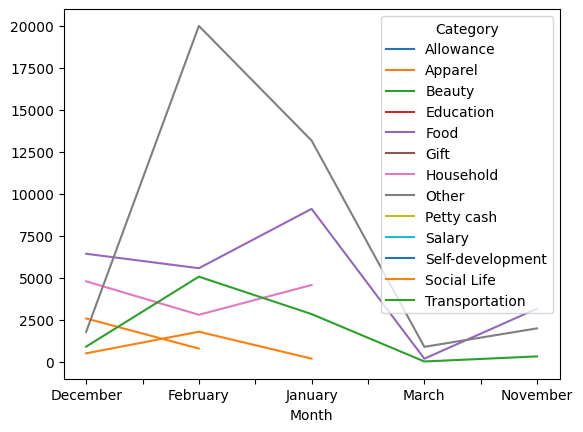

In [27]:
# plotting from pivot_table
expenses_df.pivot_table(index='Month', columns='Category', values='INR', aggfunc='sum', observed=False).plot()

<Axes: xlabel='Month'>

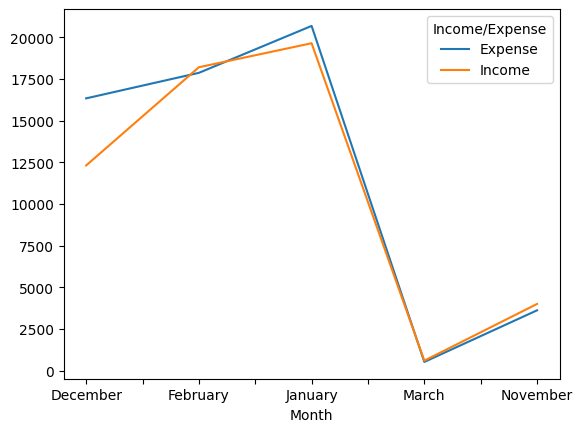

In [35]:
# another plot on a different pivot_table
expenses_df.pivot_table(index='Month', columns='Income/Expense', values='INR', aggfunc='sum', observed=False).plot()

<Axes: xlabel='Month'>

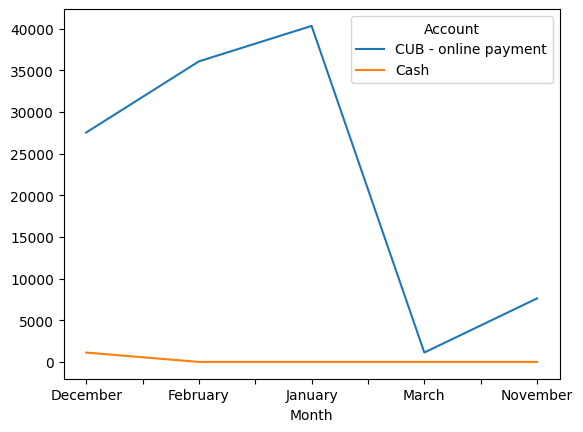

In [41]:
# another plot on a different pivot_table
# passing fill_value=0 because many of the Cash Expenditure (Account) we NaN
expenses_df.pivot_table(index='Month', columns='Account', values='INR', aggfunc='sum', fill_value=0, observed=False).plot()

Therefore, up until here, we have seen how `pivot_table()` can be used to summarised DataFrames and even plot various types of Graphs on it.